In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info=pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')
df=pd.read_csv('DATA/lending_club_loan_two.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
data_info.transpose().columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object', name='LoanStatNew')

In [4]:
len(df)

396030

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [8]:
def loan(some_text) :
    if some_text=='Fully Paid':
        return 1
    else:
        return 0

In [9]:
df['loan_status']=df['loan_status'].apply(loan)
#1=Fully paid/ 0=Chared Off

In [10]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [11]:
df[df['mort_acc'].isna()].columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [12]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [13]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [14]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [15]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [16]:
df=df.drop('emp_title',axis=1)

In [17]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [18]:
di={    '10+ years':10,
        '4 years' : 4,
        '< 1 year' : 0,
        '6 years' : 6,
        '9 years' : 9,
        '2 years' : 2,
        '3 years' : 3,
        '8 years' : 8,
        '7 years' : 7,
        '5 years' : 5,
        '1 year' : 1}

In [19]:
df=df.replace({'emp_length': di})

In [20]:
df.corr()['emp_length'].sort_values(ascending=False)

emp_length              1.000000
mort_acc                0.198174
total_acc               0.117836
loan_amnt               0.100087
installment             0.088601
revol_bal               0.087731
annual_inc              0.067569
open_acc                0.043565
dti                     0.041697
pub_rec_bankruptcies    0.038690
revol_util              0.038223
pub_rec                 0.037494
loan_status             0.013734
int_rate                0.012464
Name: emp_length, dtype: float64

In [21]:
df=df.drop('emp_length',axis=1)

In [22]:
df=df.drop('title',axis=1)

In [23]:
df.corr()['pub_rec_bankruptcies'].sort_values()

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086751
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
loan_status            -0.009383
mort_acc                0.029276
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [24]:
total_pub_rec_bankrupt = df.groupby('pub_rec').mean()['pub_rec_bankruptcies']

In [25]:
total_pub_rec_bankrupt

pub_rec
0.0     0.000000
1.0     0.810205
2.0     0.929863
3.0     1.074293
4.0     1.136622
5.0     1.113924
6.0     0.983607
7.0     0.821429
8.0     1.235294
9.0     1.250000
10.0    0.363636
11.0    0.000000
12.0    1.000000
13.0    0.500000
15.0    0.000000
17.0    1.000000
19.0    1.000000
24.0    0.000000
40.0    1.000000
86.0    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [26]:
def fill_pub_rec_bank(pub_rec,pub_rec_bankruptcies):
    if np.isnan(pub_rec_bankruptcies):
        return total_pub_rec_bankrupt[pub_rec]
    else:
        return pub_rec_bankruptcies

In [27]:
df['pub_rec_bankruptcies'] = df.apply(lambda x: fill_pub_rec_bank(x['pub_rec'], x['pub_rec_bankruptcies']), axis=1)

In [28]:
df.corr()['revol_util'].sort_values(ascending=False)

revol_util              1.000000
int_rate                0.293659
revol_bal               0.226346
installment             0.123915
loan_amnt               0.099911
dti                     0.088375
annual_inc              0.027871
mort_acc                0.005821
pub_rec                -0.075910
loan_status            -0.082373
pub_rec_bankruptcies   -0.086387
total_acc              -0.104273
open_acc               -0.131420
Name: revol_util, dtype: float64

In [29]:
df=df.dropna()

In [30]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [31]:
df.corr()['loan_status']

loan_amnt              -0.059907
int_rate               -0.247782
installment            -0.041143
annual_inc              0.053446
loan_status             1.000000
dti                    -0.062431
open_acc               -0.028158
pub_rec                -0.019951
revol_bal               0.010782
revol_util             -0.082373
total_acc               0.017792
mort_acc                0.068791
pub_rec_bankruptcies   -0.009470
Name: loan_status, dtype: float64

In [32]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395754, dtype: object

In [33]:
def termfct(some_text) :
    if some_text==' 36 months':
        return 0
    else:
        return 1
#0 : 36 months / 1 : 60 months

In [34]:
df['term'] = df['term'].apply(termfct)

In [35]:
df=df.drop('grade',axis=1)

In [36]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [37]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [38]:
df.shape

(395754, 56)

In [39]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,1,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,1,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,0,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,1,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,0,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,1,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,1,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,0,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [42]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [43]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [44]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [45]:
df = df.drop('issue_d',axis=1)

In [46]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df.drop('loan_status',axis=1).values
y=df['loan_status'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [54]:
X_train.shape

(316603, 60)

In [55]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(60,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [58]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=256,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )

Epoch 1/600
1237/1237 [==============================] - 7s 5ms/step - loss: 0.3044 - val_loss: 0.2624
Epoch 2/600
1237/1237 [==============================] - 6s 5ms/step - loss: 0.2670 - val_loss: 0.2607
Epoch 3/600
1237/1237 [==============================] - 6s 5ms/step - loss: 0.2646 - val_loss: 0.2603
Epoch 4/600
1237/1237 [==============================] - 6s 5ms/step - loss: 0.2630 - val_loss: 0.2596
Epoch 5/600
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2622 - val_loss: 0.2595
Epoch 6/600
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2616 - val_loss: 0.2592
Epoch 7/600
1237/1237 [==============================] - 6s 5ms/step - loss: 0.2612 - val_loss: 0.2598
Epoch 8/600
1237/1237 [==============================] - 6s 5ms/step - loss: 0.2609 - val_loss: 0.2590
Epoch 9/600
1237/1237 [==============================] - 6s 5ms/step - loss: 0.2604 - val_loss: 0.2585
Epoch 10/600
1237/1237 [==============================] - 6s 5ms/step - l

In [59]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

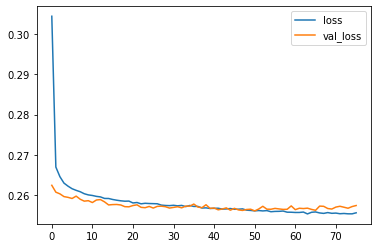

In [60]:
losses.plot()

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2474/2474 [==============================] - 4s 2ms/step


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15490
           1       0.88      1.00      0.94     63661

    accuracy                           0.89     79151
   macro avg       0.93      0.72      0.77     79151
weighted avg       0.90      0.89      0.87     79151



In [69]:
confusion_matrix(y_test,predictions)

array([[ 6925,  8565],
       [  199, 63462]], dtype=int64)

In [71]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt                 6000.00
term                         0.00
int_rate                    10.49
installment                194.99
annual_inc              103916.00
dti                         14.82
open_acc                     7.00
pub_rec                      1.00
revol_bal                10875.00
revol_util                  86.30
total_acc                   14.00
mort_acc                     1.00
pub_rec_bankruptcies         0.00
A2                           0.00
A3                           0.00
A4                           0.00
A5                           0.00
B1                           0.00
B2                           0.00
B3                           1.00
B4                           0.00
B5                           0.00
C1                           0.00
C2                           0.00
C3                           0.00
C4                           0.00
C5                           0.00
D1                           0.00
D2                           0.00
D3            

In [74]:
new_customer.shape

(60,)

In [75]:
model.predict(new_customer.values.reshape(1,60))

1/1 [==============================] - 0s 64ms/step


array([[1.]], dtype=float32)

In [76]:
df.iloc[random_ind]['loan_status']

1.0